In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [2]:
# Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Changing display settings to view all columns
pd.options.display.max_columns=999

In [4]:
# Read CSV file
bike_df=pd.read_csv('day.csv')

In [5]:
# Checking the data
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
# Checking the shape of the data
bike_df.shape

(730, 16)

In [7]:
#Getting unique value count
bike_df.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [8]:
# Checking the info about the data
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [9]:
# Checking the summary of the data
bike_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
instant,730.0,365.500000,210.877136,1.000000,183.250000,365.500000,547.750000,730.000000
season,730.0,2.498630,1.110184,1.000000,2.000000,3.000000,3.000000,4.000000
yr,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
mnth,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,730.0,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,730.0,2.995890,2.000339,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,730.0,0.690411,0.462641,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,730.0,1.394521,0.544807,1.000000,1.000000,1.000000,2.000000,3.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800


In [10]:
# Checking null values
bike_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
# Duplicate check for rows
bike_df.drop_duplicates(subset=None,inplace=True)

In [12]:
# Checking the shape again
bike_df.shape

(730, 16)

### Inferences:
- No missing values found.
- No null values found.
- No duplicates found.
- All columns are integer or float except one('dteday') which is object, therefore needs to convert it to date datatype.
- Few columns are categorial and have integer datatype and hence need to inspect it further in order to check its need to be converted to dummy variables or not.
- Minimum value for humidity is 0, which is practically impossible.

In [13]:
# Checking datatype 
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 97.0+ KB


In [14]:
# Copying the dataframe to a new dataframe to make changes 
bike_1=bike_df.copy()
bike_1.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Drop unnessasary variables
- instant - index variale, so it doesn't make any siginficance for model, so we'll drop
- dteday - year ,month and weekday as separate columns, so we'll drop
- casual + registered = cnt, we'll consider drop casual,registered and treate "cnt" as target variable

In [15]:
# Adding unnecessary columns to a list
l1=['instant','dteday','casual','registered']

In [16]:
# Dropping unnecessary columns
bike_1.drop(l1,axis=1,inplace=True)

In [17]:
# Checking the data after dropping the columns
bike_1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [18]:
# Converting to categorical datatype
category=['season','mnth','weekday','weathersit']
bike_1[category]=bike_1[category].astype('category')

In [19]:
# Checking datatype
bike_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 55.2 KB


In [20]:
# Checking the values for the weekday column
bike_df.weekday.value_counts().sort_values()

0    104
3    104
4    104
5    104
6    104
1    105
2    105
Name: weekday, dtype: int64

In [21]:
# Checking the values for the mnth column
bike_df.mnth.value_counts().sort_values()

2     56
4     60
6     60
9     60
11    60
1     62
3     62
5     62
7     62
8     62
10    62
12    62
Name: mnth, dtype: int64

In [22]:
# Mapping the numeric values to their categorical values for weekday and mnth column
bike_1['weekday']=bike_1['weekday'].map({0: 'sunday', 1: 'monday', 2: 'tuesday', 3: 'wednesday', 4: 'thursday', 5: 'friday', 6: 'saturday'})
bike_1['mnth']=bike_1['mnth'].map({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July',8: 'August',9: 'September',10: 'October',11: 'November',12: 'December'})
bike_1['season']=bike_1['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

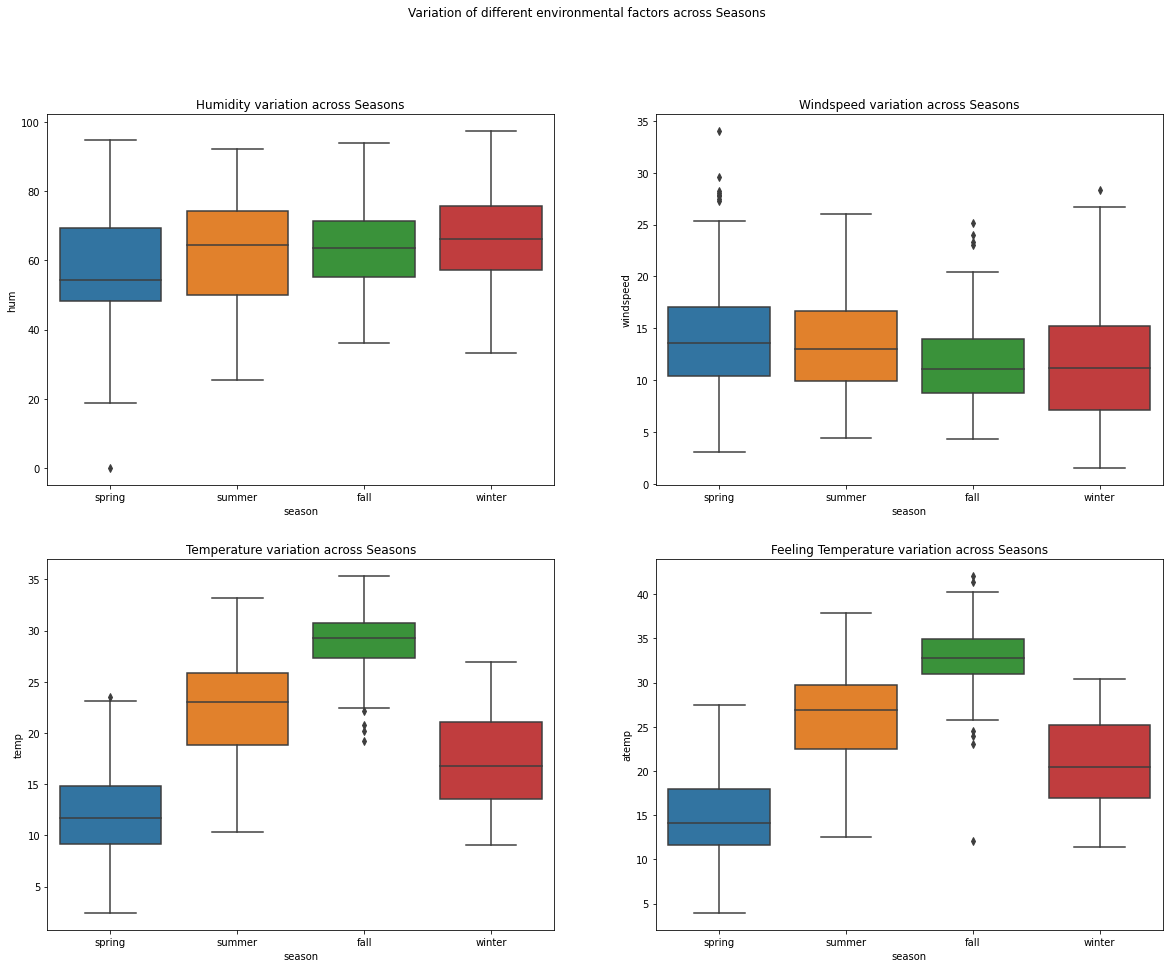

In [23]:
# Checking distribution of values for numeric columns with season
plt.figure(figsize=[20,15])
plt.suptitle("Variation of different environmental factors across Seasons")
plt.subplot(2,2,1)
sns.boxplot(data=bike_1,x='season',y='hum')
plt.title("Humidity variation across Seasons")
plt.subplot(2,2,2)
sns.boxplot(data=bike_1,y='windspeed',x='season')
plt.title("Windspeed variation across Seasons")
plt.subplot(2,2,3)
sns.boxplot(data=bike_1,x='season',y='temp')
plt.title("Temperature variation across Seasons")
plt.subplot(2,2,4)
sns.boxplot(data=bike_1,x='season',y='atemp')
plt.title("Feeling Temperature variation across Seasons")
plt.show()

### Inferences:
- Humidity has an outlier at 0, which seems like an impossible option.
- Windspeed has outliers for seasons - spring, fall and winter.
- Humidity and windspeed dont have much variation various seasons.
- Temperature and Feeling Temperature have huge variation between seasons which is obvious.
- Temperature has outliers for fall and spring.
- Temperature has outliers for fall and spring.

In [24]:
# Checking the number of records where humidity is zero as its practically impossible and needs to be imputed
bike_1[bike_1['hum']==0]

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
68,spring,0,March,0,saturday,0,3,15.952731,19.2834,0.0,17.545759,623


In [25]:
# Imputing the zero humidity value with the mean value for spring season
bike_1.groupby(by=['season']).mean()['hum']['spring']       #Getting the mean value for spring column
mean_val=bike_1.groupby(by=['season']).mean()['hum']['spring']
bike_1.loc[(bike_1['season']=="spring")&(bike_1['hum']==0),'hum']=mean_val

In [26]:
# Checking the rows with humidity after imputation
bike_1[bike_1['hum']==0]

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt


In [27]:
# Adding numeric columns to a list for visualisation purpose
numeric_Col=['temp','atemp','hum','windspeed','cnt']

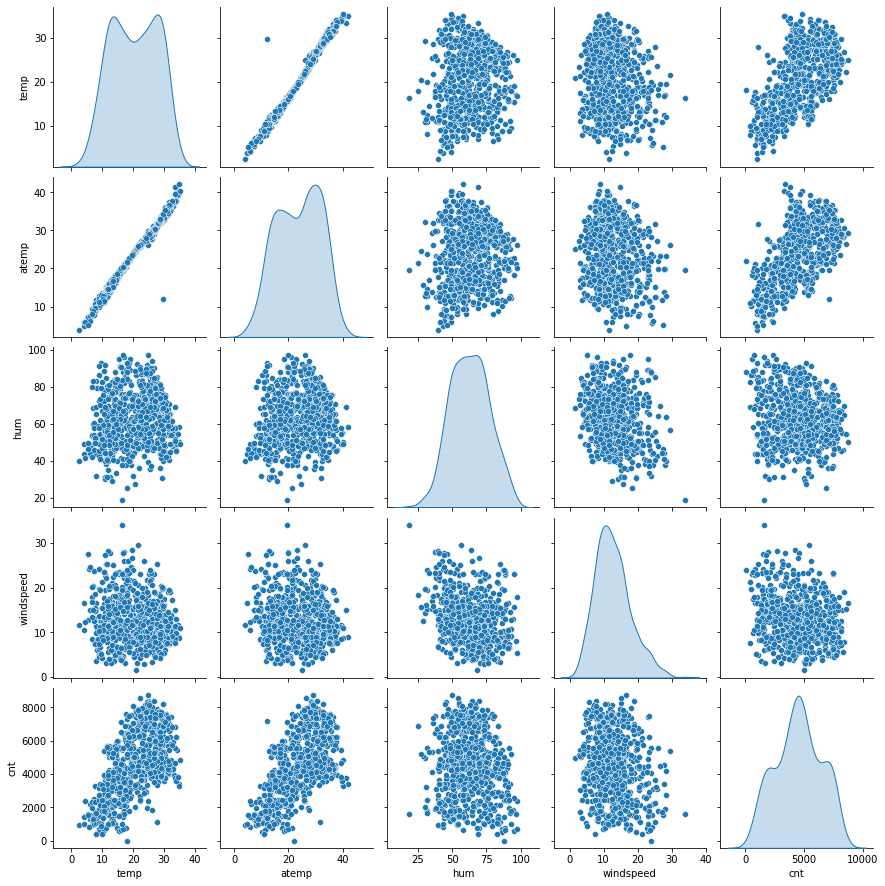

In [28]:
# creating pairplots to see the relation between numeric variables

sns.pairplot(bike_1[numeric_Col],diag_kind='kde')
plt.show()

### Inferences on numeric variables with target variable(count):
- Temperature and feeling temperature have high correlation with the target variable (count).
- Humidity & windspeed does not indicate any specific behaviour on just visualising the data.
- Temperature and Feeling temperature have high correlation with each other.

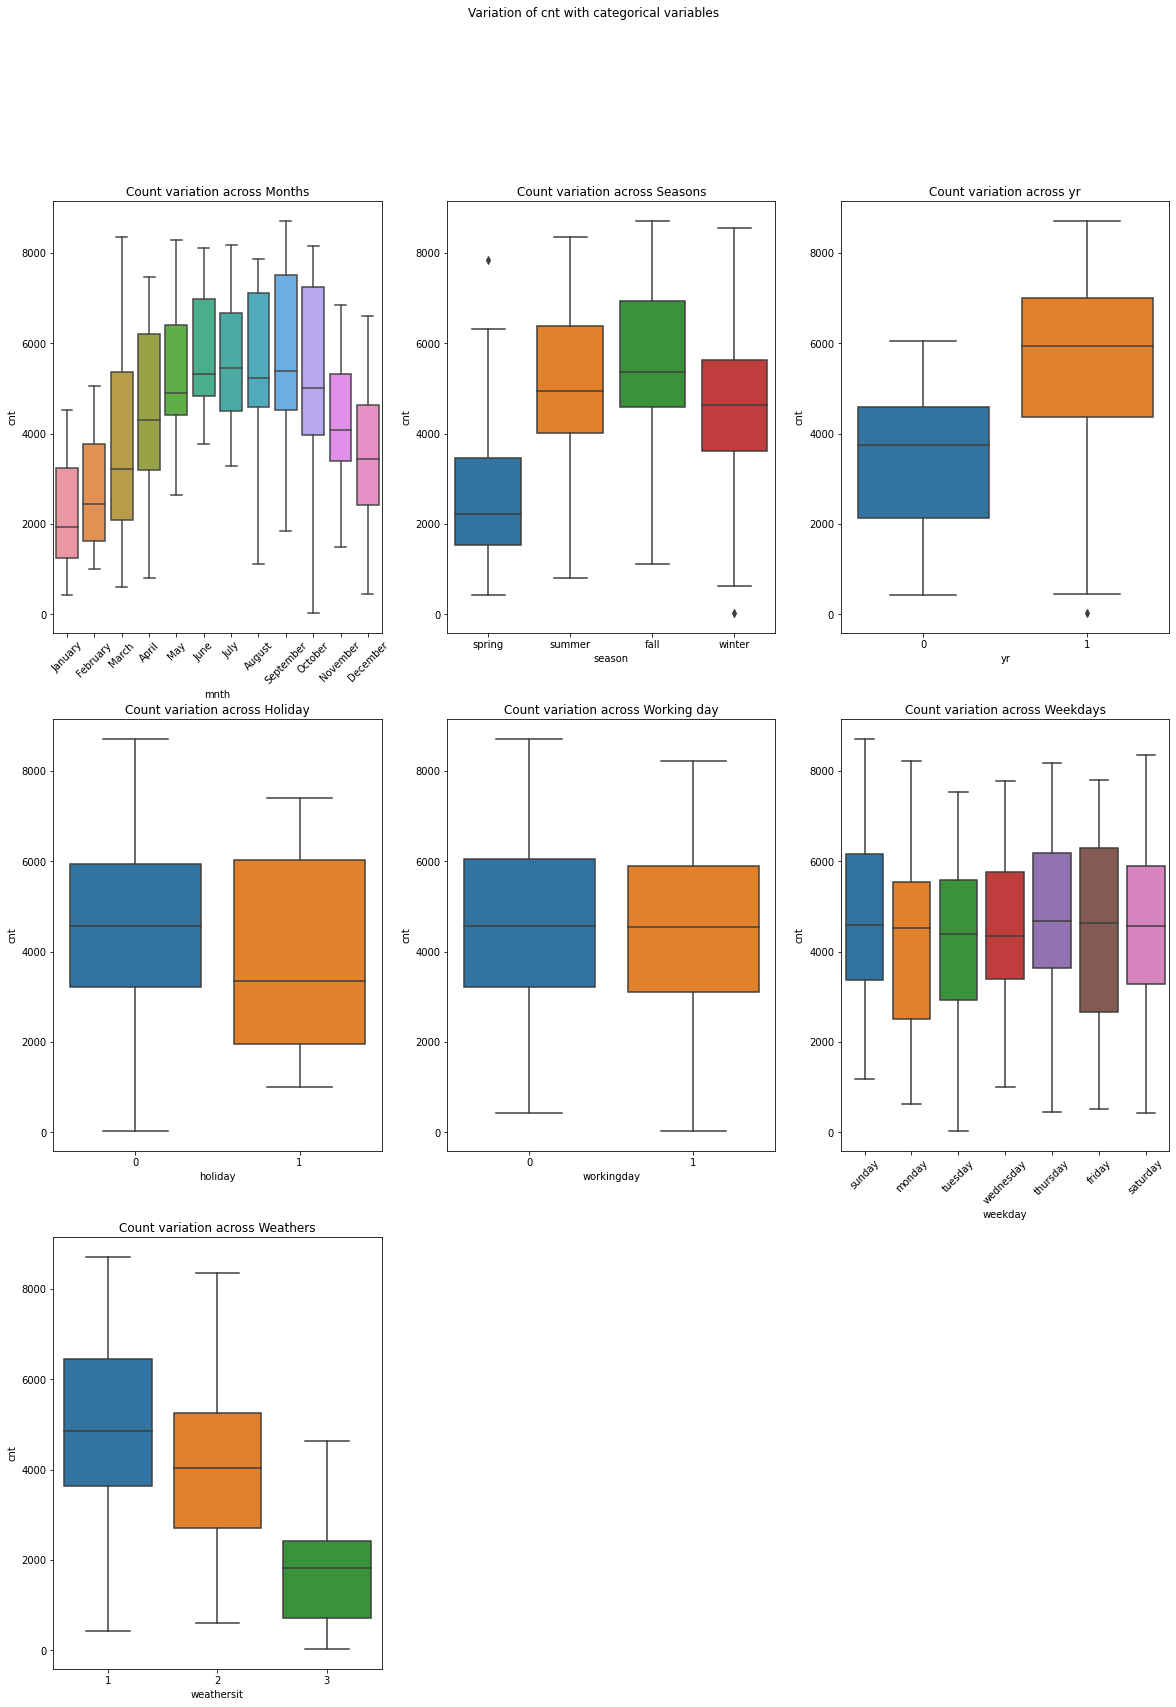

In [29]:
# Visualizing the categorical columns relation with the target variable
plt.figure(figsize=[20,27])
plt.suptitle("Variation of cnt with categorical variables")
plt.subplot(3,3,1)
sns.boxplot(data=bike_1,x='mnth',y='cnt')
plt.xticks(rotation=45)
plt.title("Count variation across Months")
plt.subplot(3,3,2)
sns.boxplot(data=bike_1,x='season',y='cnt')
plt.title("Count variation across Seasons")
plt.subplot(3,3,3)
plt.title("Count variation across yr")
sns.boxplot(data=bike_1,x='yr',y='cnt')
plt.subplot(3,3,4)
sns.boxplot(data=bike_1,x='holiday',y='cnt')
plt.title("Count variation across Holiday")
plt.subplot(3,3,5)
sns.boxplot(data=bike_1,x='workingday',y='cnt')
plt.title("Count variation across Working day")
plt.subplot(3,3,6)
sns.boxplot(data=bike_1,x='weekday',y='cnt')
plt.xticks(rotation=45)
plt.title("Count variation across Weekdays")
plt.subplot(3,3,7)
sns.boxplot(data=bike_1,x='weathersit',y='cnt')
plt.title("Count variation across Weathers")
plt.show()

# Visualisation Inference:

- Count has increased significantly in 2019 compared to 2018.
- Count reduced during holidays.
- Working Day / Non-Working Day shows almost similar behaviour
- Count is higher during May to October months.
- Count is higher for fall(Autumn) and then followed by Summer.
- Count is higher on Clear, Few clouds, Partly cloudy, Partly cloudy days followed by Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist days. No records found for Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog weather.
- For weekdays, the median is almost similar for all days.



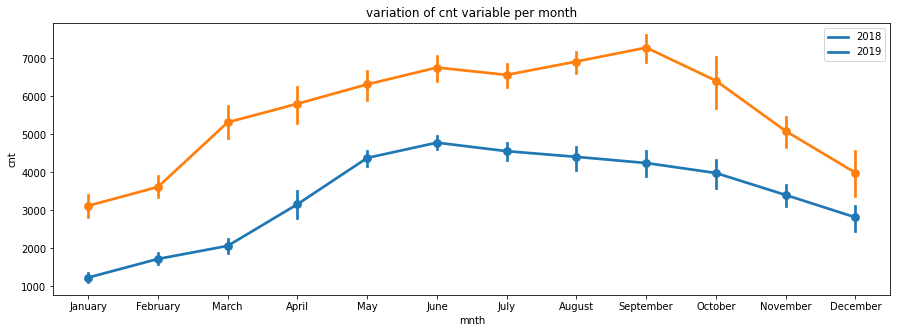

In [30]:
# Visualizing the variation of cnt variable per month for both the years
plt.figure(figsize=[15,5])
plt.title("variation of cnt variable per month")
sns.pointplot(data=bike_1,x='mnth',y='cnt',hue='yr')
plt.legend(["2018","2019"])
plt.show()

<AxesSubplot:>

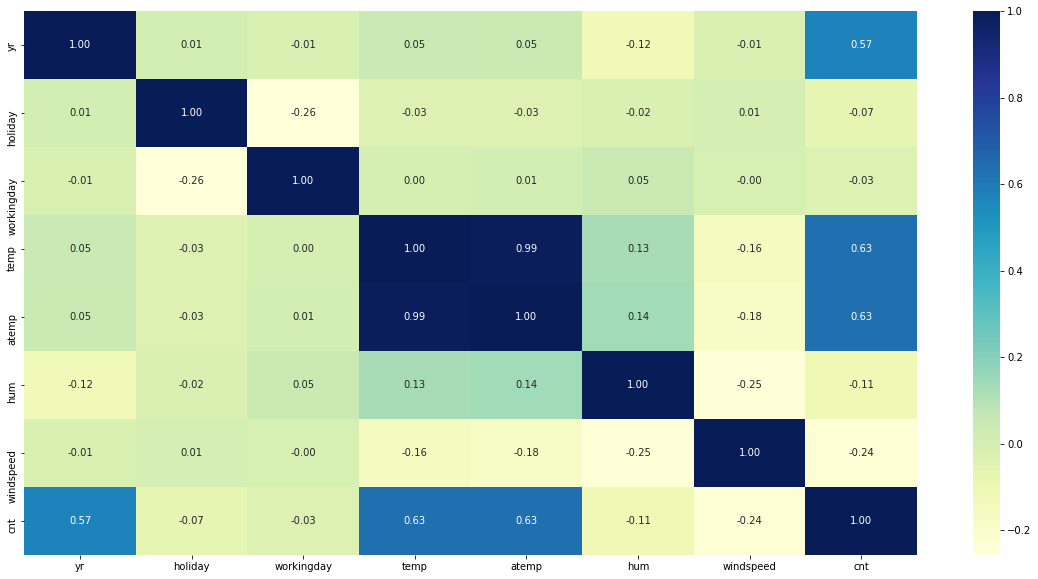

In [31]:
# Checking correlation between variables
plt.figure(figsize=[20,10])
sns.heatmap(bike_1.corr(),annot=True,cmap='YlGnBu',fmt=".2f")

### Infrences
- Count went 2X in 2019 in comparison with 2018
- variation in count from July to September in 2019 compared to 2018.
- Temperature and Feeling temperature have extremely high correlation with each other.
- Temperature and Feeling temperature have same correlation with target variable(cnt) and hence one of them can be dropped.

In [32]:
# Dropping 'atemp' as it has very high correlation with temp
bike_1.drop('atemp',axis=1,inplace=True)

In [33]:
# Checking columns after droping
bike_1.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [34]:
# Adding variables to a list to create dummy variables
dummy=['mnth','weathersit','weekday','season']

In [35]:
# Creating Dummy Variables
bike_dummy=pd.get_dummies(bike_1[dummy],drop_first=True)

In [36]:
# checking the dataframe
bike_dummy.head()

,mnth_February,mnth_March,mnth_April,mnth_May,mnth_June,mnth_July,mnth_August,mnth_September,mnth_October,mnth_November,mnth_December,weathersit_2,weathersit_3,weekday_monday,weekday_tuesday,weekday_wednesday,weekday_thursday,weekday_friday,weekday_saturday,season_summer,season_fall,season_winter
0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [37]:
#Concating the dataframe with dummy variables with the original dataframe to get all the variables together
bike_1=pd.concat([bike_1,bike_dummy],axis=1)
bike_1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,mnth_February,mnth_March,mnth_April,mnth_May,mnth_June,mnth_July,mnth_August,mnth_September,mnth_October,mnth_November,mnth_December,weathersit_2,weathersit_3,weekday_monday,weekday_tuesday,weekday_wednesday,weekday_thursday,weekday_friday,weekday_saturday,season_summer,season_fall,season_winter
0,spring,0,January,0,monday,1,2,14.110847,80.5833,10.749882,985,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
1,spring,0,January,0,tuesday,1,2,14.902598,69.6087,16.652113,801,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
2,spring,0,January,0,wednesday,1,1,8.050924,43.7273,16.636703,1349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,spring,0,January,0,thursday,1,1,8.200000,59.0435,10.739832,1562,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,spring,0,January,0,friday,1,1,9.305237,43.6957,12.522300,1600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [38]:
# Dropping 'mnth','weathersit','season' and 'weekday' as we created dummy variables for them.
bike_1.drop(dummy,axis=1,inplace=True)

In [39]:
# Checking the data after dropping the columns
bike_1.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,mnth_February,mnth_March,mnth_April,mnth_May,mnth_June,mnth_July,mnth_August,mnth_September,mnth_October,mnth_November,mnth_December,weathersit_2,weathersit_3,weekday_monday,weekday_tuesday,weekday_wednesday,weekday_thursday,weekday_friday,weekday_saturday,season_summer,season_fall,season_winter
0,0,0,1,14.110847,80.5833,10.749882,985,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
1,0,0,1,14.902598,69.6087,16.652113,801,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [40]:
# Checking the shape after concatenation
bike_1.shape

(730, 29)

In [41]:
# Split into test and train data
bike_train,bike_test=train_test_split(bike_1,train_size=0.7,random_state=225)

In [42]:
# Checking the shape of training dataset
bike_train.shape

(510, 29)

In [43]:
# Checking the shape of test dataset
bike_test.shape

(220, 29)

In [44]:
# Rescaling the training dataset
scale=MinMaxScaler()
scaling=['temp','hum','windspeed','cnt']
bike_train[scaling]=scale.fit_transform(bike_train[scaling])

In [45]:
# Checking the normalized train data
bike_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,mnth_February,mnth_March,mnth_April,mnth_May,mnth_June,mnth_July,mnth_August,mnth_September,mnth_October,mnth_November,mnth_December,weathersit_2,weathersit_3,weekday_monday,weekday_tuesday,weekday_wednesday,weekday_thursday,weekday_friday,weekday_saturday,season_summer,season_fall,season_winter
713,1,0,0,0.341967,0.551624,0.200296,0.588890,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
441,1,0,1,0.533355,0.773782,0.249281,0.687917,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
397,1,0,0,0.438736,0.582947,0.393145,0.438181,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
636,1,0,0,0.623673,0.401972,0.489567,1.000000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
528,1,0,1,0.769902,0.456496,0.765528,0.867104,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [46]:
# Checking the summary of the normalized train data
bike_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
yr,510.0,0.501961,0.500487,0.0,0.000000,1.000000,1.000000,1.0
holiday,510.0,0.029412,0.169124,0.0,0.000000,0.000000,0.000000,1.0
workingday,510.0,0.698039,0.459559,0.0,0.000000,1.000000,1.000000,1.0
temp,510.0,0.562085,0.235657,0.0,0.362933,0.561848,0.770710,1.0
hum,510.0,0.519507,0.197425,0.0,0.367964,0.513921,0.662268,1.0
windspeed,510.0,0.403051,0.184486,0.0,0.273045,0.379812,0.497535,1.0
cnt,510.0,0.522565,0.223872,0.0,0.366167,0.530060,0.684665,1.0
mnth_February,510.0,0.078431,0.269113,0.0,0.000000,0.000000,0.000000,1.0
mnth_March,510.0,0.096078,0.294988,0.0,0.000000,0.000000,0.000000,1.0
mnth_April,510.0,0.074510,0.262857,0.0,0.000000,0.000000,0.000000,1.0


In [47]:
# Dividing training dataset into x n y variables
y_train = bike_train.pop('cnt')
X_train = bike_train

In [48]:
# Checking the y variable
y_train.head()

713    0.588890
441    0.687917
397    0.438181
636    1.000000
528    0.867104
Name: cnt, dtype: float64

In [49]:
# Checking the X variable
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,mnth_February,mnth_March,mnth_April,mnth_May,mnth_June,mnth_July,mnth_August,mnth_September,mnth_October,mnth_November,mnth_December,weathersit_2,weathersit_3,weekday_monday,weekday_tuesday,weekday_wednesday,weekday_thursday,weekday_friday,weekday_saturday,season_summer,season_fall,season_winter
713,1,0,0,0.341967,0.551624,0.200296,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
441,1,0,1,0.533355,0.773782,0.249281,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
397,1,0,0,0.438736,0.582947,0.393145,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
636,1,0,0,0.623673,0.401972,0.489567,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
528,1,0,1,0.769902,0.456496,0.765528,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


### Model Building

In [50]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
# Choosing top 15 features by RFE
rfe=RFE(lr,15)
rfe=rfe.fit(X_train,y_train)

In [52]:
# Check the top 15 features chosen by RFE
top15=pd.DataFrame()
top15['features']=X_train.columns
top15['Feature Chosen'] = rfe.support_
top15['Ranking']=rfe.ranking_
top15.sort_values(by='Ranking')

,features,Feature Chosen,Ranking
0,yr,True,1
25,season_summer,True,1
18,weathersit_3,True,1
17,weathersit_2,True,1
14,mnth_October,True,1
26,season_fall,True,1
9,mnth_May,True,1
8,mnth_April,True,1
13,mnth_September,True,1
27,season_winter,True,1


In [53]:
# getting the columns chosen by rfe
rfe_col=X_train.columns[rfe.support_]

In [54]:
# Creating the independent variable dataset using the columns selected by RFE method.
X_train_rfe=X_train[rfe_col]

In [55]:
X_train_rfe.shape

(510, 15)

### Model 1 

In [56]:
# Adding constant value for the calculation of intercept and needs to be added explicitly for statsmodel.
X_train_rfe_constn=sm.add_constant(X_train_rfe)
lm1=sm.OLS(y_train,X_train_rfe_constn).fit()
# Checking the summary
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     176.9
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          1.64e-187
Time:                        16:23:38   Log-Likelihood:                 512.32
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     494   BIC:                            -924.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2003      0.022      9.123      0.000       0.157       0.243
yr                 0.2295      0.008     28.077      0.000       0.213       0.246
holiday           -0.0603      0.024     -2.531      0.012      -0.107      -0.013
temp               0.4876      0.033     14.781      0.000       0.423       0.552
hum               -0.1776      0.029     -6.051      0.000      -0.235      -0.120
windspeed         -0.1491      0.024     -6.300      0.000      -0.196      -0.103
mnth_March         0.0295      0.015      1.905      0.057      -0.001       0.060
mnth_April         0.0132      0.021      0.630      0.529      -0.028       0.054
mnth_May           0.0348      0.020      1.765      0.078      -0.004       0.074
mnth_September     0.0987      0.016      6.180      0.000       0.067       0.130
mnth_October       0.0581      0.018      3.258      0.001       0.023       0.093
weathersit_2      -0.0387      0.011     -3.596      0.000      -0.060      -0.018
weathersit_3      -0.2227      0.030     -7.521      0.000      -0.281      -0.165
season_summer      0.1150      0.019      6.059      0.000       0.078       0.152
season_fall        0.0769      0.021      3.650      0.000       0.036       0.118
season_winter      0.1536      0.014     10.737      0.000       0.126       0.182
==============================================================================
Omnibus:                       79.291   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.036
Skew:                          -0.845   Prob(JB):                     1.19e-37
Kurtosis:                       5.268   Cond. No.                         16.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
# Calculating vif
vif_df=pd.DataFrame()
vif_df['features']=X_train_rfe.columns
vif_df['vif']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif_df['vif']=round(vif_df['vif'])
vif_df.sort_values(by='vif',ascending=False)

,features,vif
2,temp,22.0
3,hum,11.0
13,season_fall,7.0
12,season_summer,6.0
4,windspeed,4.0
14,season_winter,3.0
0,yr,2.0
6,mnth_April,2.0
7,mnth_May,2.0
9,mnth_October,2.0


### Inferences from Model 1 :
- temp: vif= 22 which is higest and more than 5, hence it needs to be dropped.

In [58]:
# Dropping temp
X_train_rfe.drop('temp',axis=1,inplace=True)

In [59]:
# Checking the columns again
X_train_rfe.columns

Index(['yr', 'holiday', 'hum', 'windspeed', 'mnth_March', 'mnth_April',
       'mnth_May', 'mnth_September', 'mnth_October', 'weathersit_2',
       'weathersit_3', 'season_summer', 'season_fall', 'season_winter'],
      dtype='object')

### Model 2 

In [60]:
# Adding constant value for the calculation of intercept and needs to be added explicitly for statsmodel.
X_train_rfe_constn=sm.add_constant(X_train_rfe)
lm2=sm.OLS(y_train,X_train_rfe_constn).fit()
# Checking the summary
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     120.8
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          1.62e-149
Time:                        16:23:38   Log-Likelihood:                 418.93
No. Observations:                 510   AIC:                            -807.9
Df Residuals:                     495   BIC:                            -744.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3188      0.025     12.998      0.000       0.271       0.367
yr                 0.2411      0.010     24.699      0.000       0.222       0.260
holiday           -0.0688      0.029     -2.406      0.016      -0.125      -0.013
hum               -0.0936      0.035     -2.709      0.007      -0.161      -0.026
windspeed         -0.1458      0.028     -5.135      0.000      -0.202      -0.090
mnth_March         0.0307      0.019      1.654      0.099      -0.006       0.067
mnth_April        -0.0417      0.025     -1.687      0.092      -0.090       0.007
mnth_May           0.0507      0.024      2.145      0.032       0.004       0.097
mnth_September     0.0937      0.019      4.889      0.000       0.056       0.131
mnth_October       0.1033      0.021      4.899      0.000       0.062       0.145
weathersit_2      -0.0695      0.013     -5.489      0.000      -0.094      -0.045
weathersit_3      -0.2764      0.035     -7.839      0.000      -0.346      -0.207
season_summer      0.2719      0.019     14.413      0.000       0.235       0.309
season_fall        0.3250      0.015     21.268      0.000       0.295       0.355
season_winter      0.2040      0.017     12.237      0.000       0.171       0.237
==============================================================================
Omnibus:                       62.366   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.284
Skew:                          -0.699   Prob(JB):                     3.78e-28
Kurtosis:                       4.997   Cond. No.                         14.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
# Calculating vif
vif_df=pd.DataFrame()
vif_df['features']=X_train_rfe.columns
vif_df['vif']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif_df['vif']=round(vif_df['vif'])
vif_df.sort_values(by='vif',ascending=False)

,features,vif
2,hum,8.0
3,windspeed,4.0
11,season_summer,4.0
13,season_winter,3.0
0,yr,2.0
5,mnth_April,2.0
6,mnth_May,2.0
8,mnth_October,2.0
9,weathersit_2,2.0
12,season_fall,2.0


### Inferences from Model 2 :
- hum: vif=8.0 i.e highest hence it needs to be dropped.

### Model 3 

In [62]:
# Dropping weekday_friday
X_train_rfe.drop('hum',axis=1,inplace=True)
X_train_rfe_constn=sm.add_constant(X_train_rfe)
lm3=sm.OLS(y_train,X_train_rfe_constn).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     127.9
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          5.21e-149
Time:                        16:23:38   Log-Likelihood:                 415.18
No. Observations:                 510   AIC:                            -802.4
Df Residuals:                     496   BIC:                            -743.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2726      0.018     15.376      0.000       0.238       0.307
yr                 0.2452      0.010     25.284      0.000       0.226       0.264
holiday           -0.0661      0.029     -2.301      0.022      -0.123      -0.010
windspeed         -0.1265      0.028     -4.573      0.000      -0.181      -0.072
mnth_March         0.0332      0.019      1.779      0.076      -0.003       0.070
mnth_April        -0.0395      0.025     -1.587      0.113      -0.088       0.009
mnth_May           0.0402      0.023      1.713      0.087      -0.006       0.086
mnth_September     0.0839      0.019      4.430      0.000       0.047       0.121
mnth_October       0.0990      0.021      4.677      0.000       0.057       0.141
weathersit_2      -0.0897      0.010     -8.707      0.000      -0.110      -0.069
weathersit_3      -0.3180      0.032     -9.963      0.000      -0.381      -0.255
season_summer      0.2705      0.019     14.251      0.000       0.233       0.308
season_fall        0.3206      0.015     20.966      0.000       0.291       0.351
season_winter      0.1998      0.017     11.960      0.000       0.167       0.233
==============================================================================
Omnibus:                       60.073   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.884
Skew:                          -0.690   Prob(JB):                     4.16e-26
Kurtosis:                       4.897   Cond. No.                         9.59
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
# Calculating vif
vif_df=pd.DataFrame()
vif_df['features']=X_train_rfe.columns
vif_df['vif']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif_df['vif']=round(vif_df['vif'])
vif_df.sort_values(by='vif',ascending=False)

,features,vif
10,season_summer,4.0
2,windspeed,3.0
0,yr,2.0
4,mnth_April,2.0
5,mnth_May,2.0
7,mnth_October,2.0
11,season_fall,2.0
12,season_winter,2.0
1,holiday,1.0
3,mnth_March,1.0


### Inferences from Model 3 :

- mnth_April has highest p values hence it needs to be dropped.

### Model 4

In [64]:
# Dropping weekday_thursday
X_train_rfe.drop('mnth_April',axis=1,inplace=True)
X_train_rfe_constn=sm.add_constant(X_train_rfe)
lm4=sm.OLS(y_train,X_train_rfe_constn).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     137.9
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          1.51e-149
Time:                        16:23:38   Log-Likelihood:                 413.89
No. Observations:                 510   AIC:                            -801.8
Df Residuals:                     497   BIC:                            -746.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2723      0.018     15.335      0.000       0.237       0.307
yr                 0.2450      0.010     25.225      0.000       0.226       0.264
holiday           -0.0665      0.029     -2.312      0.021      -0.123      -0.010
windspeed         -0.1295      0.028     -4.685      0.000      -0.184      -0.075
mnth_March         0.0415      0.018      2.310      0.021       0.006       0.077
mnth_May           0.0596      0.020      2.963      0.003       0.020       0.099
mnth_September     0.0840      0.019      4.428      0.000       0.047       0.121
mnth_October       0.0993      0.021      4.682      0.000       0.058       0.141
weathersit_2      -0.0903      0.010     -8.756      0.000      -0.111      -0.070
weathersit_3      -0.3195      0.032     -9.997      0.000      -0.382      -0.257
season_summer      0.2529      0.015     16.370      0.000       0.223       0.283
season_fall        0.3223      0.015     21.098      0.000       0.292       0.352
season_winter      0.2016      0.017     12.074      0.000       0.169       0.234
==============================================================================
Omnibus:                       55.063   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.919
Skew:                          -0.646   Prob(JB):                     1.65e-23
Kurtosis:                       4.808   Cond. No.                         9.57
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
# Calculating vif
vif_df=pd.DataFrame()
vif_df['features']=X_train_rfe.columns
vif_df['vif']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif_df['vif']=round(vif_df['vif'])
vif_df.sort_values(by='vif',ascending=False)

,features,vif
2,windspeed,3.0
0,yr,2.0
4,mnth_May,2.0
6,mnth_October,2.0
9,season_summer,2.0
10,season_fall,2.0
11,season_winter,2.0
1,holiday,1.0
3,mnth_March,1.0
5,mnth_September,1.0


### Inferences from Model 4 :

- mnth_march and holiday has same p-values we are dropping march.

### Model 5 

In [66]:
# Dropping weekday_wednesday
X_train_rfe.drop("mnth_March",axis=1,inplace=True)
X_train_rfe_constn=sm.add_constant(X_train_rfe)
lm5=sm.OLS(y_train,X_train_rfe_constn).fit()
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     148.7
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          1.69e-149
Time:                        16:23:38   Log-Likelihood:                 411.17
No. Observations:                 510   AIC:                            -798.3
Df Residuals:                     498   BIC:                            -747.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2810      0.017     16.128      0.000       0.247       0.315
yr                 0.2441      0.010     25.040      0.000       0.225       0.263
holiday           -0.0719      0.029     -2.495      0.013      -0.128      -0.015
windspeed         -0.1237      0.028     -4.474      0.000      -0.178      -0.069
mnth_May           0.0516      0.020      2.594      0.010       0.013       0.091
mnth_September     0.0842      0.019      4.421      0.000       0.047       0.122
mnth_October       0.0990      0.021      4.651      0.000       0.057       0.141
weathersit_2      -0.0903      0.010     -8.720      0.000      -0.111      -0.070
weathersit_3      -0.3211      0.032    -10.006      0.000      -0.384      -0.258
season_summer      0.2506      0.015     16.184      0.000       0.220       0.281
season_fall        0.3121      0.015     21.258      0.000       0.283       0.341
season_winter      0.1915      0.016     11.832      0.000       0.160       0.223
==============================================================================
Omnibus:                       48.254   Durbin-Watson:                   1.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.937
Skew:                          -0.554   Prob(JB):                     5.41e-22
Kurtosis:                       4.839   Cond. No.                         9.55
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
# Calculating vif
vif_df=pd.DataFrame()
vif_df['features']=X_train_rfe.columns
vif_df['vif']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif_df['vif']=round(vif_df['vif'])
vif_df.sort_values(by='vif',ascending=False)

,features,vif
2,windspeed,3.0
0,yr,2.0
3,mnth_May,2.0
5,mnth_October,2.0
8,season_summer,2.0
9,season_fall,2.0
10,season_winter,2.0
1,holiday,1.0
4,mnth_September,1.0
6,weathersit_2,1.0


### Inferences from Model 5 :

-   holiday has highest p-values(more than 0.05) we are dropping holiday.

### Model 6 

In [68]:
# Dropping weekday_monday
X_train_rfe.drop('holiday',axis=1,inplace=True)
X_train_rfe_constn=sm.add_constant(X_train_rfe)
lm5=sm.OLS(y_train,X_train_rfe_constn).fit()
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     161.3
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          2.82e-149
Time:                        16:23:38   Log-Likelihood:                 408.00
No. Observations:                 510   AIC:                            -794.0
Df Residuals:                     499   BIC:                            -747.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2788      0.017     15.939      0.000       0.244       0.313
yr                 0.2445      0.010     24.954      0.000       0.225       0.264
windspeed         -0.1273      0.028     -4.587      0.000      -0.182      -0.073
mnth_May           0.0507      0.020      2.538      0.011       0.011       0.090
mnth_September     0.0823      0.019      4.303      0.000       0.045       0.120
mnth_October       0.0987      0.021      4.615      0.000       0.057       0.141
weathersit_2      -0.0900      0.010     -8.642      0.000      -0.110      -0.070
weathersit_3      -0.3176      0.032     -9.856      0.000      -0.381      -0.254
season_summer      0.2532      0.016     16.302      0.000       0.223       0.284
season_fall        0.3135      0.015     21.261      0.000       0.285       0.342
season_winter      0.1930      0.016     11.871      0.000       0.161       0.225
==============================================================================
Omnibus:                       47.100   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.359
Skew:                          -0.564   Prob(JB):                     3.94e-20
Kurtosis:                       4.712   Cond. No.                         9.52
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
# Calculating vif
vif_df=pd.DataFrame()
vif_df['features']=X_train_rfe.columns
vif_df['vif']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif_df['vif']=round(vif_df['vif'])
vif_df.sort_values(by='vif',ascending=False)

,features,vif
1,windspeed,3.0
0,yr,2.0
2,mnth_May,2.0
4,mnth_October,2.0
7,season_summer,2.0
8,season_fall,2.0
9,season_winter,2.0
3,mnth_September,1.0
5,weathersit_2,1.0
6,weathersit_3,1.0


### Inferences from Model 6 :

-   may has highest p-values(more than 0.05) we are dropping may.

### Model 7

In [70]:
X_train_rfe.drop('mnth_May',axis=1,inplace=True)
X_train_rfe_constn=sm.add_constant(X_train_rfe) 
lm6=sm.OLS(y_train,X_train_rfe_constn).fit()
lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     176.5
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          4.97e-149
Time:                        16:23:38   Log-Likelihood:                 404.73
No. Observations:                 510   AIC:                            -789.5
Df Residuals:                     500   BIC:                            -747.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2819      0.018     16.067      0.000       0.247       0.316
yr                 0.2442      0.010     24.791      0.000       0.225       0.264
windspeed         -0.1340      0.028     -4.823      0.000      -0.189      -0.079
mnth_September     0.0822      0.019      4.272      0.000       0.044       0.120
mnth_October       0.0990      0.022      4.603      0.000       0.057       0.141
weathersit_2      -0.0896      0.010     -8.554      0.000      -0.110      -0.069
weathersit_3      -0.3176      0.032     -9.801      0.000      -0.381      -0.254
season_summer      0.2713      0.014     19.577      0.000       0.244       0.299
season_fall        0.3129      0.015     21.110      0.000       0.284       0.342
season_winter      0.1922      0.016     11.763      0.000       0.160       0.224
==============================================================================
Omnibus:                       47.845   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.513
Skew:                          -0.601   Prob(JB):                     7.34e-19
Kurtosis:                       4.577   Cond. No.                         9.48
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
# Calculating vif
vif_df=pd.DataFrame()
vif_df['features']=X_train_rfe.columns
vif_df['vif']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif_df['vif']=round(vif_df['vif'])
vif_df.sort_values(by='vif',ascending=False)

,features,vif
1,windspeed,3.0
0,yr,2.0
3,mnth_October,2.0
6,season_summer,2.0
7,season_fall,2.0
8,season_winter,2.0
2,mnth_September,1.0
4,weathersit_2,1.0
5,weathersit_3,1.0


In [72]:
# Checking the coefficients for the features
lm6.params.sort_values(ascending=False)

season_fall       0.312918
const             0.281862
season_summer     0.271339
yr                0.244155
season_winter     0.192209
mnth_October      0.099025
mnth_September    0.082155
weathersit_2     -0.089555
windspeed        -0.133952
weathersit_3     -0.317594
dtype: float64

In [73]:
# Predicting the dependent variable values using the model
y_train_pred = lm6.predict(X_train_rfe_constn)

In [74]:
# Calculating residual
res=y_train-y_train_pred

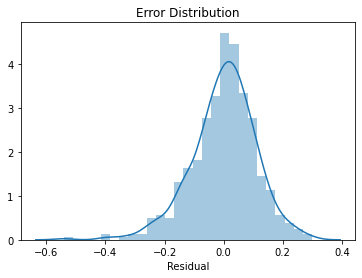

In [75]:
# Plotting the residual
plt.title("Error Distribution")
sns.distplot(res)
plt.xlabel("Residual")
plt.ylabel("")
plt.show()

#### Inferences:
- Error is normally distributed across 0 which indicates that our model has handled the assumption of Error Normal Distribution properly.

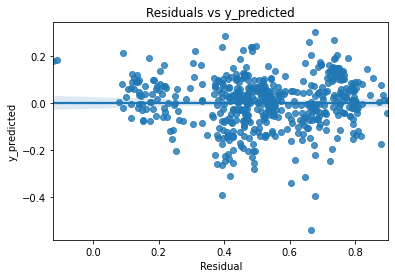

In [76]:
# Plotting Residuals vs y_predicted
plt.title("Residuals vs y_predicted")
sns.regplot(x=y_train_pred, y=res)
plt.xlabel("Residual")
plt.ylabel("y_predicted")
plt.show()

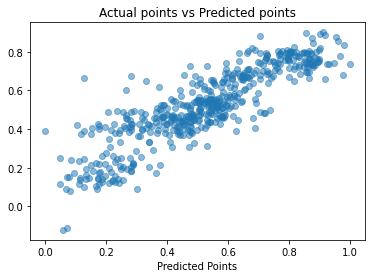

In [77]:
# Checking the Homoscedasticity property by plotting the predicted points vs Actual points
plt.title("Actual points vs Predicted points")
plt.scatter(x=y_train,y=y_train_pred, alpha=0.5)
plt.xlabel("Actual Points")
plt.xlabel("Predicted Points")
plt.show()

#### Inferences:
- we see that there is almost no relation between Residual & Predicted Values. No specific pattern found.
- Equal distribution of the variance from the 2nd graph. 

In [78]:
# Transforming the test data
bike_test[scaling]=scale.transform(bike_test[scaling])

In [79]:
# Checking the scaled test data
bike_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,mnth_February,mnth_March,mnth_April,mnth_May,mnth_June,mnth_July,mnth_August,mnth_September,mnth_October,mnth_November,mnth_December,weathersit_2,weathersit_3,weekday_monday,weekday_tuesday,weekday_wednesday,weekday_thursday,weekday_friday,weekday_saturday,season_summer,season_fall,season_winter
59,0,0,1,0.267777,0.390951,0.462897,0.214344,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0.216540,0.254464,0.392461,0.184929,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
347,0,0,1,0.333364,0.570185,0.092007,0.435720,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1
391,1,0,0,0.472068,0.678074,0.764068,0.402438,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
29,0,0,1,0.203076,0.651518,0.123078,0.125864,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [80]:
# Checking the summary of the test data
bike_test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
yr,220.0,0.495455,0.501120,0.000000,0.000000,0.000000,1.000000,1.000000
holiday,220.0,0.027273,0.163248,0.000000,0.000000,0.000000,0.000000,1.000000
workingday,220.0,0.672727,0.470288,0.000000,0.000000,1.000000,1.000000,1.000000
temp,220.0,0.565616,0.238092,0.048245,0.355406,0.574213,0.767215,1.035482
hum,220.0,0.524600,0.191546,-0.092227,0.392691,0.528132,0.662123,0.940835
windspeed,220.0,0.396423,0.186550,0.047504,0.259637,0.364235,0.512205,1.157215
cnt,220.0,0.533049,0.234076,0.090589,0.373374,0.532052,0.727939,1.018634
mnth_February,220.0,0.072727,0.260281,0.000000,0.000000,0.000000,0.000000,1.000000
mnth_March,220.0,0.059091,0.236333,0.000000,0.000000,0.000000,0.000000,1.000000
mnth_April,220.0,0.100000,0.300684,0.000000,0.000000,0.000000,0.000000,1.000000


In [81]:
# Divide into X_test and y_test
y_test=bike_test.pop('cnt')
X_test=bike_test

In [82]:
# Adding the columns used in the final model in a list
final_col=X_train_rfe.columns
final_col

Index(['yr', 'windspeed', 'mnth_September', 'mnth_October', 'weathersit_2',
       'weathersit_3', 'season_summer', 'season_fall', 'season_winter'],
      dtype='object')

In [83]:
# Filtering the test data on the basis of columns used in the final model
X_test=X_test[final_col]
X_test_constn=sm.add_constant(X_test)

In [84]:
# Predicting Test Data Using final model
y_test_pred=lm6.predict(X_test_constn)

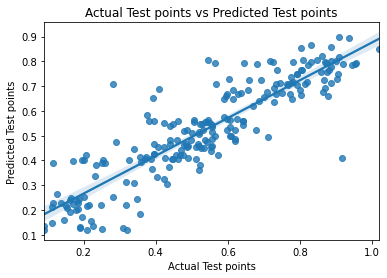

In [85]:
# Plotting the predicted test points with the actual test points
plt.title("Actual Test points vs Predicted Test points")
sns.regplot(y_test, y_test_pred)
plt.xlabel("Actual Test points")
plt.ylabel("Predicted Test points")
plt.show()

In [86]:
# Generating r2_score
r2_score(y_true=y_test,y_pred=y_test_pred)

0.7809649428651568

## Final Inferences:

- Top 3 features after building the model are:
    1. Season_fall - A coefficient value of ‘0.31298’ indicated that a unit increase in temp variable increases the bike hire count by 0.31298 units.
    2. Season Summer - A coefficient value of ‘0.271339’ indicated that a unit increase in yr variable increases the bike hire count by 0.271339 units.
    3. Year (weathersit_3) - A coefficient value of ‘0.244155’ indicated that a unit increase in weathersit_3 variable increased the bike hire count by 0.244155 units.
    
weathersit_3 - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

#### Therefore, its important to consider these variables with utmost importance in order to achieve higher bookings.


- Next 2 important features are:
    4. Windspeed (windspeed) - A coefficient value of ‘-0.133952’ indicated that a unit increase in weathersit_3 variable decreases the bike hire count by 0.133952 units.
    5. Winter Season (season_winter) - A coefficient value of ‘0.192209’ indicated that a unit increase in temp variable increases the bike hire count by 0.192209 units.
The intercept value is 0.281862